

<br><h1>Regression Model Development</h1>
<h4>DAT-5303 | Machine Learning</h4>
Ulf Kavlie<br>
Hult International Business School<br><br><br>



In [2]:
# importing necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing necessary packages from ScikitLearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
file = "./Apprentice_Chef_Dataset.xlsx"
data_types = {"AVG_CLICKS_PER_VISIT":float} # change type of AVG_CLICKS_PER_VISIT according to data dictionary
df = pd.read_excel(io = file,
                   dtype = data_types
                  )
df = df.rename(columns = {"LARGEST_ORDER_SIZE" : "AVG_ORDER_SIZE"}) # Renaming LARGEST_ORDER_SIZE to AVG_ORDER_SIZE
df.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17.0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13.0,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16.0,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14.0,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12.0,205


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [5]:
df.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


In [6]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i, df[i].isnull().sum())

FAMILY_NAME 47


# FEATURE ENGINEERING

## CONTINUOUS VARIABLES: Response Variable

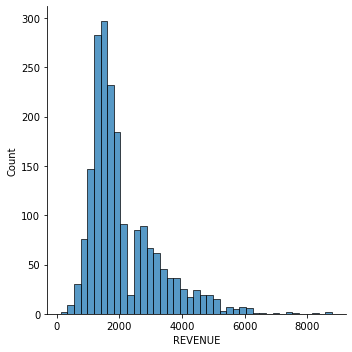

In [7]:
# Looking at the distribution of "REVENUE"

sns.displot(x = "REVENUE",
           data = df)

plt.tight_layout()
plt.show()

In [8]:
# log-transforming "REVENUE"

df["log_REVENUE"] = np.log10(df["REVENUE"])

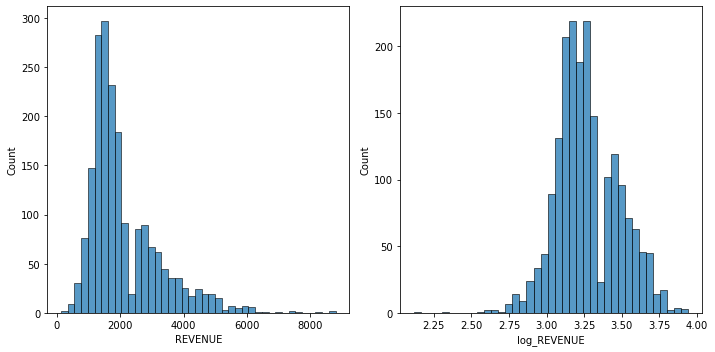

In [9]:
fig, ax = plt.subplots(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(x = "REVENUE",
             data = df
            )
plt.subplot(1,2,2)
sns.histplot(x = "log_REVENUE",
             data = df
            )

plt.tight_layout()
plt.show()

## CONTINUOUS VARIABLES: Explanatory variables

- TOTAL_MEALS_ORDERED
- AVG_TIME_PER_SITE_VISIT
- TOTAL_PHOTOS_VIEWED
- AVG_PREP_VID_TIME

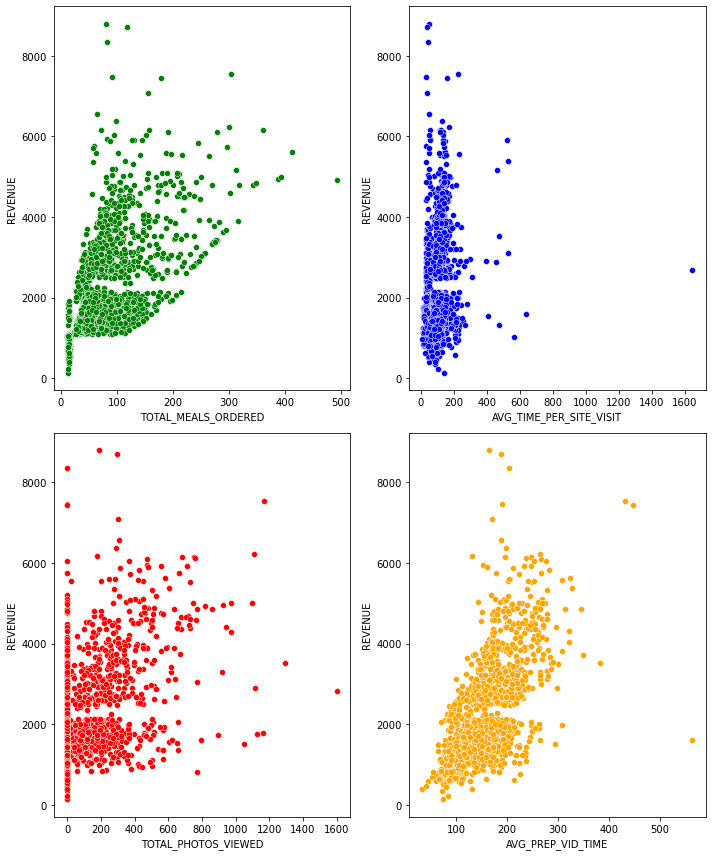

In [10]:
# Looking at distribution of the other continuous variables

fig, ax = plt.subplots(figsize = (10,12))

plt.subplot(2,2,1)
sns.scatterplot(x = df["TOTAL_MEALS_ORDERED"],
                y = df["REVENUE"],
                color = "green"
               )
plt.subplot(2,2,2)
sns.scatterplot(x = df["AVG_TIME_PER_SITE_VISIT"],
                y = df["REVENUE"],
                color = "blue"
               )
plt.subplot(2,2,3)
sns.scatterplot(x = df["TOTAL_PHOTOS_VIEWED"],
                y = df["REVENUE"],
                color = "red"
               )
plt.subplot(2,2,4)
sns.scatterplot(x = df["AVG_PREP_VID_TIME"],
                y = df["REVENUE"],
                color = "orange"
               )
plt.tight_layout()
plt.show()

In [11]:
# Checking the column TOTAL_PHOTOS_VIEWED for number of 0 vs non-0

photo_zeroes = sum(df["TOTAL_PHOTOS_VIEWED"]==0)


print(f"""
                 Zero\t\tOther Values
                -----------------------------
Photos         | {photo_zeroes}\t\t{len(df) - photo_zeroes}""")


                 Zero		Other Values
                -----------------------------
Photos         | 1140		806


In [12]:
# Creating a dummie variable for column "TOTAL_PHOTOS_VIEWED"

df["VIEWS_PHOTO"]=0
for index, value in df.iterrows():
    if df.loc[index,"TOTAL_PHOTOS_VIEWED"]>0:
        df.loc[index,"VIEWS_PHOTO"]=1

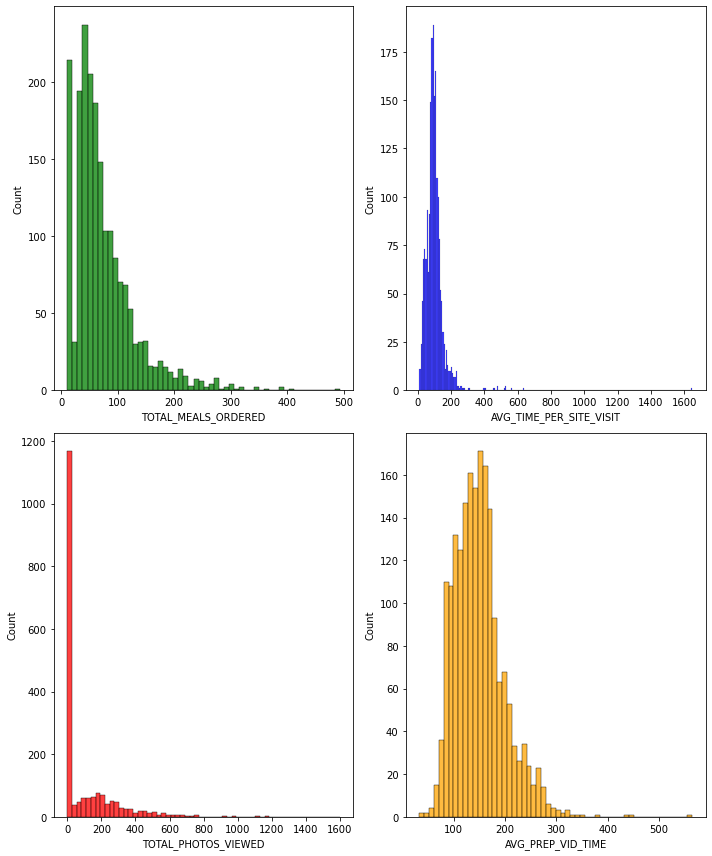

In [13]:
# Showing histogram for variables

fig, ax = plt.subplots(figsize = (10,12))

plt.subplot(2,2,1)
sns.histplot(x = df["TOTAL_MEALS_ORDERED"],
            color = "green")

plt.subplot(2,2,2)
sns.histplot(x = df["AVG_TIME_PER_SITE_VISIT"],
            color = "blue")

plt.subplot(2,2,3)
sns.histplot(x = df["TOTAL_PHOTOS_VIEWED"],
            color = "red")

plt.subplot(2,2,4)
sns.histplot(x = df["AVG_PREP_VID_TIME"],
            color = "orange")

plt.tight_layout()
plt.show()

In [14]:
# log-transforming "TOTAL_MEALS_ORDERED", "AVG_PREP_VID_TIME" and "AVG_TIME_PER_SITE_VISIT"

df["log_TOTAL_MEALS_ORDERED"]= np.log10(df["TOTAL_MEALS_ORDERED"])
df["log_AVG_TIME_PER_SITE_VISIT"]= np.log10(df["AVG_TIME_PER_SITE_VISIT"])
df["log_AVG_PREP_VID_TIME"]=np.log(df["AVG_PREP_VID_TIME"])

# log-transforming "TOTAL_PHOTOS_VIEWED" which has 0
df["log_TOTAL_PHOTOS_VIEWED"]=0
for index, value in df.iterrows():
    if df.loc[index,"TOTAL_PHOTOS_VIEWED"]==0:
        df.loc[index,"log_TOTAL_PHOTOS_VIEWED"]=np.log10(0.01)
    else:
        df.loc[index,"log_TOTAL_PHOTOS_VIEWED"] = np.log10(df.loc[index, "TOTAL_PHOTOS_VIEWED"])

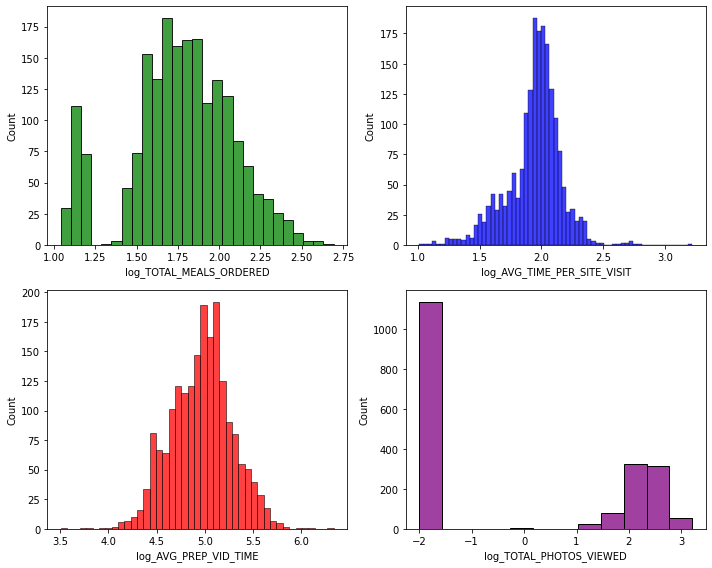

In [15]:
# Checking the new distributions

fig, ax = plt.subplots(figsize = (10,8))

plt.subplot(2,2,1)
sns.histplot(x = df["log_TOTAL_MEALS_ORDERED"],
            color = "green")

plt.subplot(2,2,2)
sns.histplot(x = df["log_AVG_TIME_PER_SITE_VISIT"],
            color = "blue")

plt.subplot(2,2,3)
sns.histplot(x = df["log_AVG_PREP_VID_TIME"],
            color = "red")

plt.subplot(2,2,4)
sns.histplot(x = df["log_TOTAL_PHOTOS_VIEWED"],
            color = "purple")

plt.tight_layout()
plt.show()

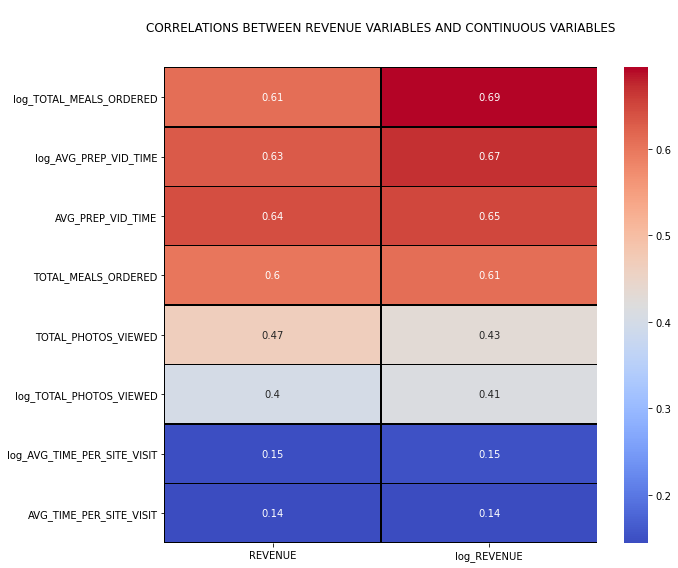

In [16]:
# CHECKING FOR CORRELATIONS 

fig, ax = plt.subplots(figsize=(10,8))

continuous = ["TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT","TOTAL_PHOTOS_VIEWED",
              "AVG_PREP_VID_TIME","log_TOTAL_MEALS_ORDERED","log_AVG_TIME_PER_SITE_VISIT",
              "log_AVG_PREP_VID_TIME","log_REVENUE","REVENUE","log_TOTAL_PHOTOS_VIEWED"]

continuous_corr = df[continuous].corr(method = "pearson")


sns.heatmap(continuous_corr.loc[["TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT",
                                 "TOTAL_PHOTOS_VIEWED","AVG_PREP_VID_TIME","log_TOTAL_MEALS_ORDERED",
                                 "log_AVG_TIME_PER_SITE_VISIT","log_AVG_PREP_VID_TIME","log_TOTAL_PHOTOS_VIEWED"],
                                ["REVENUE","log_REVENUE"]].sort_values(by = "log_REVENUE", ascending = False),
            annot = True,
            cmap = "coolwarm",
            linecolor = "black",
            linewidth = 0.5
           )

plt.title("""
CORRELATIONS BETWEEN REVENUE VARIABLES AND CONTINUOUS VARIABLES

""")
plt.tight_layout()
plt.show()

## INTERVAL VARIABLES

- MEDIAN_MEAL_RATING
- PRODUCT_CATEGORIES_VIEWED
- AVG_ORDER_SIZE 
- WEEKLY_PLAN
- EARLY_DELIVERIES
- LATE_DELIVERIES
- CANCELLATIONS_BEFORE_NOON
- CANCELLATIONS_AFTER_NOON
- MASTER_CLASSES_ATTENDED
- UNIQUE_MEALS_PURCH
- AVG_CLICKS_PER_VISIT
- CONTACTS_W_CUSTOMER_SERVICE
- PC_LOGINS
- MOBILE_LOGINS

In [17]:
int_var = ["MEDIAN_MEAL_RATING", "PRODUCT_CATEGORIES_VIEWED", "AVG_ORDER_SIZE" , "WEEKLY_PLAN", "EARLY_DELIVERIES",
"LATE_DELIVERIES", "CANCELLATIONS_BEFORE_NOON", "CANCELLATIONS_AFTER_NOON", "MASTER_CLASSES_ATTENDED",
"UNIQUE_MEALS_PURCH", "AVG_CLICKS_PER_VISIT", "CONTACTS_W_CUSTOMER_SERVICE", "PC_LOGINS", "MOBILE_LOGINS"]

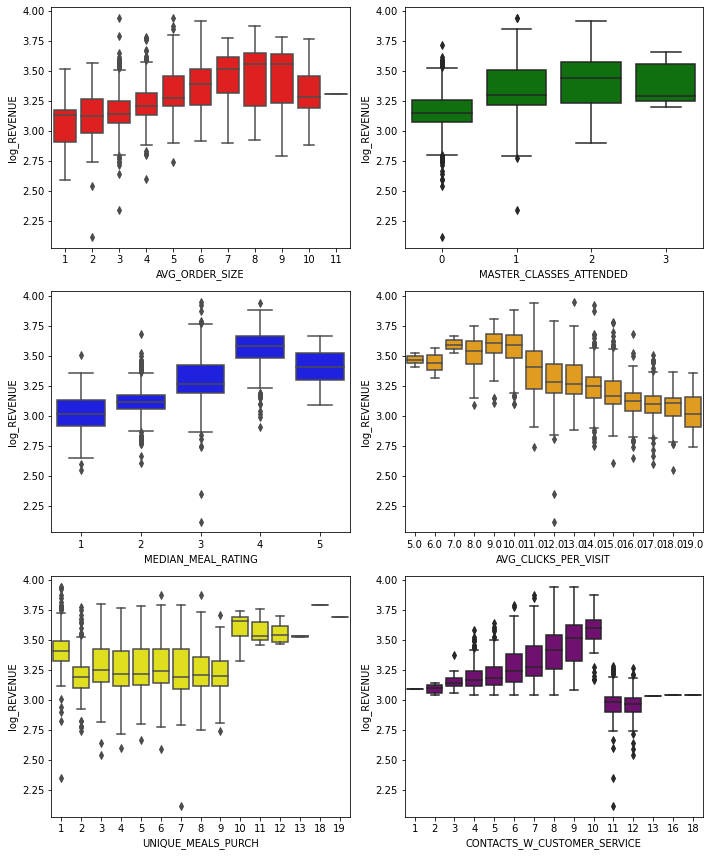

In [18]:
# The most important interval variables

fig, ax = plt.subplots(figsize = (10,12))

plt.subplot(3,2,1)
sns.boxplot(x = df["AVG_ORDER_SIZE"],
            y = df["log_REVENUE"],
            color = "red")

plt.subplot(3,2,2)
sns.boxplot(x = df["MASTER_CLASSES_ATTENDED"],
            y = df["log_REVENUE"],
            color = "green")

plt.subplot(3,2,3)
sns.boxplot(x = df["MEDIAN_MEAL_RATING"],
            y = df["log_REVENUE"],
            color = "blue")

plt.subplot(3,2,4)
sns.boxplot(x = df["AVG_CLICKS_PER_VISIT"],
            y = df["log_REVENUE"],
            color = "orange")

plt.subplot(3,2,5)
sns.boxplot(x = df["UNIQUE_MEALS_PURCH"],
            y = df["log_REVENUE"],
            color = "yellow")

plt.subplot(3,2,6)
sns.boxplot(x = df["CONTACTS_W_CUSTOMER_SERVICE"],
            y = df["log_REVENUE"],
            color = "purple")

plt.tight_layout()
plt.show()

In [19]:
# QUADRATIC TRANSFORMATION OF INTERVAL VARIABLES

df["SQ_MEDIAN_MEAL_RATING"] = df["MEDIAN_MEAL_RATING"]**2
df["SQ_AVG_CLICKS_PER_VISIT"] = df["AVG_CLICKS_PER_VISIT"]**2
df["SQ_MASTER_CLASSES_ATTENDED"] = df["MASTER_CLASSES_ATTENDED"]**2
df["SQ_AVG_ORDER_SIZE"] = df["AVG_ORDER_SIZE"]**2

In [20]:
#CHECKING COUNT OF UNIQUE MEALS ORDERED ABOVE 10
high_unique_meals = sum(df["UNIQUE_MEALS_PURCH"]>=10)

#CHECKING COUNT OF CONTACTS WITH CUSTOMER SERVICE ABOVE 11
high_cs_contact = sum(df["CONTACTS_W_CUSTOMER_SERVICE"]>=11)

print(f"""
                  HIGH\t\tOTHER
                 ---------------------
Unique meals    | {high_unique_meals}\t\t{len(df) - high_unique_meals}
Contact w/CS    | {high_cs_contact}\t\t{len(df) - high_cs_contact}

""")


                  HIGH		OTHER
                 ---------------------
Unique meals    | 19		1927
Contact w/CS    | 216		1730




In [21]:
# Creating categorical variable from interval

df["HIGH_CONTACT_W_CUSTOMER_SUPPORT"]=0
for index, value in df.iterrows():
    if df.loc[index,"CONTACTS_W_CUSTOMER_SERVICE"]>=11:
        df.loc[index,"HIGH_CONTACT_W_CUSTOMER_SUPPORT"]=1

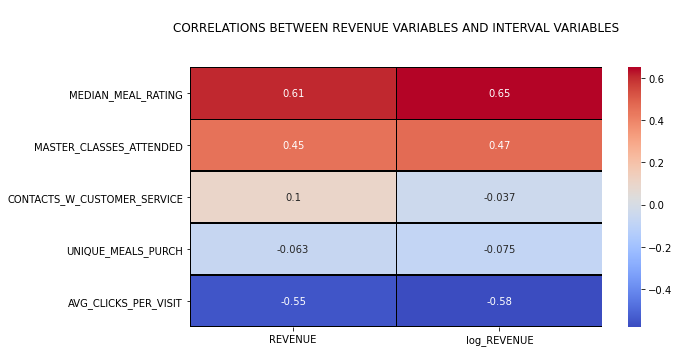

In [22]:
# Checking correlations for interval variables

fig, ax = plt.subplots(figsize = (10,5))

int_var = ["UNIQUE_MEALS_PURCH","MEDIAN_MEAL_RATING",
           "AVG_CLICKS_PER_VISIT","MASTER_CLASSES_ATTENDED",
           "CONTACTS_W_CUSTOMER_SERVICE","REVENUE","log_REVENUE"]

interval_corr = df[int_var].corr(method = "pearson")


sns.heatmap(interval_corr.loc[["UNIQUE_MEALS_PURCH","MEDIAN_MEAL_RATING",
                               "AVG_CLICKS_PER_VISIT","MASTER_CLASSES_ATTENDED",
                               "CONTACTS_W_CUSTOMER_SERVICE"],
                              ["REVENUE","log_REVENUE"]].sort_values(by = "log_REVENUE", ascending = False),
            annot = True,
            cmap = "coolwarm",
            linecolor = "black",
            linewidth = 0.5
           )
plt.title("""
CORRELATIONS BETWEEN REVENUE VARIABLES AND INTERVAL VARIABLES

""")
plt.tight_layout()
plt.show()

## CATEGORICAL VARIABLES

- CROSS_SELL_SUCCESS
- TASTES_AND_PREFERENCES
- PACKAGE_LOCKER
- REFRIGERATED_LOCKER
- HIGH_CONTACT_W_CUSTOMER_SUPPORT
- VIEWS_PHOTO

In [23]:
cat_var = ["REVENUE","log_REVENUE","CROSS_SELL_SUCCESS", "TASTES_AND_PREFERENCES", "PACKAGE_LOCKER",
           "REFRIGERATED_LOCKER","HIGH_CONTACT_W_CUSTOMER_SUPPORT", "VIEWS_PHOTO"]

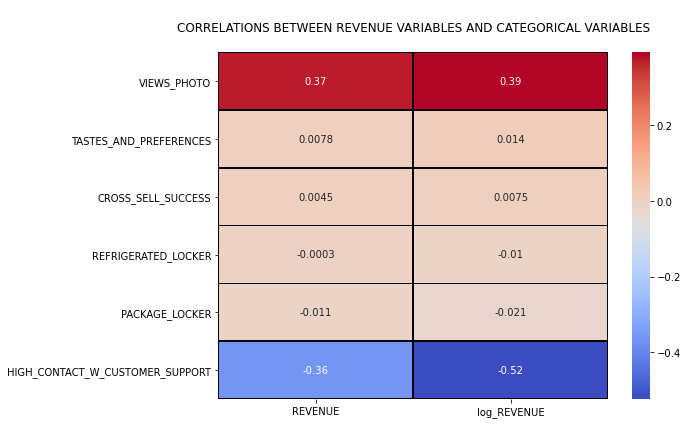

In [24]:
# Checking correlation for all categorical variables, including those created
fig, ax = plt.subplots(figsize = (10,6))

cat_corr = df[cat_var].corr()

sns.heatmap(cat_corr.loc[["CROSS_SELL_SUCCESS", "TASTES_AND_PREFERENCES",
                          "PACKAGE_LOCKER","REFRIGERATED_LOCKER",
                          "HIGH_CONTACT_W_CUSTOMER_SUPPORT", "VIEWS_PHOTO"],
                         ["REVENUE","log_REVENUE"]].sort_values(by = "log_REVENUE", ascending = False),
            cmap = "coolwarm",
            annot = True,
            linecolor = "black",
            linewidth = 0.5)
plt.title("""
CORRELATIONS BETWEEN REVENUE VARIABLES AND CATEGORICAL VARIABLES
""")

plt.tight_layout()
plt.show()

# FURTHER FEATURE ENGINEERING

In [25]:
# Creating new variables

# Share of total meals ordered that are unique
df["SHARES_UNIQUE"]=df["UNIQUE_MEALS_PURCH"]/df["TOTAL_MEALS_ORDERED"]

# How much does a customer explore on their website/app
df["EXPLORATION"]=df["TOTAL_PHOTOS_VIEWED"]+df["PRODUCT_CATEGORIES_VIEWED"]

# How much does a customer explore on their website/app on average per visit
df["TOTAL_LOGIN"]=df["MOBILE_LOGINS"]+df["PC_LOGINS"] 
df["AVG_EXPLORATION"]=df["EXPLORATION"]/df["TOTAL_LOGIN"]

# Share of orders that are cancelled
df["TOTAL_CANCELLATION"] = df["CANCELLATIONS_AFTER_NOON"]+df["CANCELLATIONS_BEFORE_NOON"]
df["CANCELLATION_PERCENTAGE"] = df["TOTAL_CANCELLATION"]/df["TOTAL_MEALS_ORDERED"]

# How much time they spend in total 
df["AVG_SITE_TIME"]=(df["AVG_TIME_PER_SITE_VISIT"]+df["AVG_PREP_VID_TIME"])

# Complain as a percentage of meals ordered
df["COMPLAIN_RATIO"] = df["CONTACTS_W_CUSTOMER_SERVICE"]/df["TOTAL_MEALS_ORDERED"]


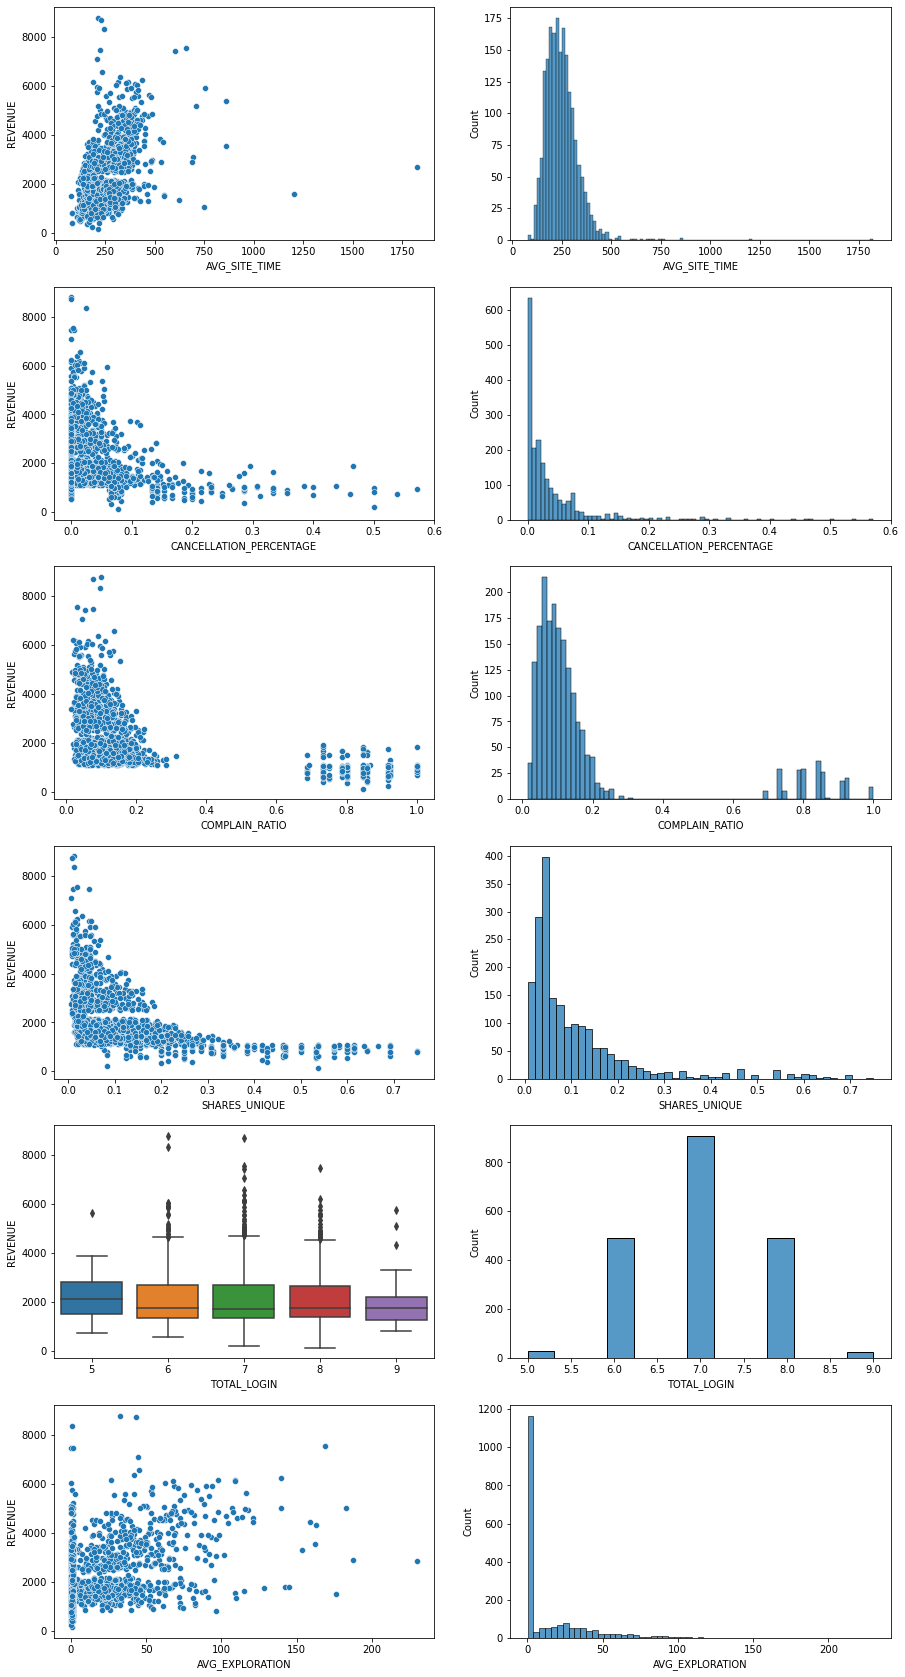

In [26]:
# Checking out the new variables


fig, ax = plt.subplots(figsize = (15,30))


plt.subplot(6,2,1)
sns.scatterplot(x = df["AVG_SITE_TIME"],
                y = df["REVENUE"]
            )
plt.subplot(6,2,2)
sns.histplot(x = "AVG_SITE_TIME",
            data = df
            )

plt.subplot(6,2,3)
sns.scatterplot(x = df["CANCELLATION_PERCENTAGE"],
                y = df["REVENUE"]
            )
plt.subplot(6,2,4)
sns.histplot(x = "CANCELLATION_PERCENTAGE",
            data = df
            )

plt.subplot(6,2,5)
sns.scatterplot(x = df["COMPLAIN_RATIO"],
                y = df["REVENUE"]
            )
plt.subplot(6,2,6)
sns.histplot(x = "COMPLAIN_RATIO",
            data = df
            )

plt.subplot(6,2,7)
sns.scatterplot(x = df["SHARES_UNIQUE"],
                y = df["REVENUE"]
            )
plt.subplot(6,2,8)
sns.histplot(x = "SHARES_UNIQUE",
            data = df
            )

plt.subplot(6,2,9)
sns.boxplot(x = df["TOTAL_LOGIN"],
                y = df["REVENUE"]
            )
plt.subplot(6,2,10)
sns.histplot(x = "TOTAL_LOGIN",
            data = df
            )

plt.subplot(6,2,11)
sns.scatterplot(x = df["AVG_EXPLORATION"],
                y = df["REVENUE"]
            )
plt.subplot(6,2,12)
sns.histplot(x = "AVG_EXPLORATION",
            data = df
            )


plt.show()

In [27]:
# Transforming necessary data to log

df["log_SHARES_UNIQUE"] = np.log10(df["SHARES_UNIQUE"])
df["log_AVG_SITE_TIME"] = np.log10(df["AVG_SITE_TIME"])
df["log_COMPLAIN_RATIO"]=np.log(df["COMPLAIN_RATIO"])

# log-transformation of cancellation percentage, which contains 0
df["log_CANCELLATION_PERCENTAGE"]=0
# looping over every value
for index, value in df.iterrows():
    # checks for 0 values
    if df.loc[index,"CANCELLATION_PERCENTAGE"]==0:
        # takes log10 of 0.001
        df.loc[index,"log_CANCELLATION_PERCENTAGE"]=np.log(0.001)
    else:
        df.loc[index,"log_CANCELLATION_PERCENTAGE"] = np.log(df.loc[index, "CANCELLATION_PERCENTAGE"])

# Dummie variable of customers who cancels       
df["CANCELLING_CUSTOMER"]=0
for index, value in df.iterrows():
    if df.loc[index,"TOTAL_CANCELLATION"]>0:
        df.loc[index,"CANCELLING_CUSTOMER"]=1



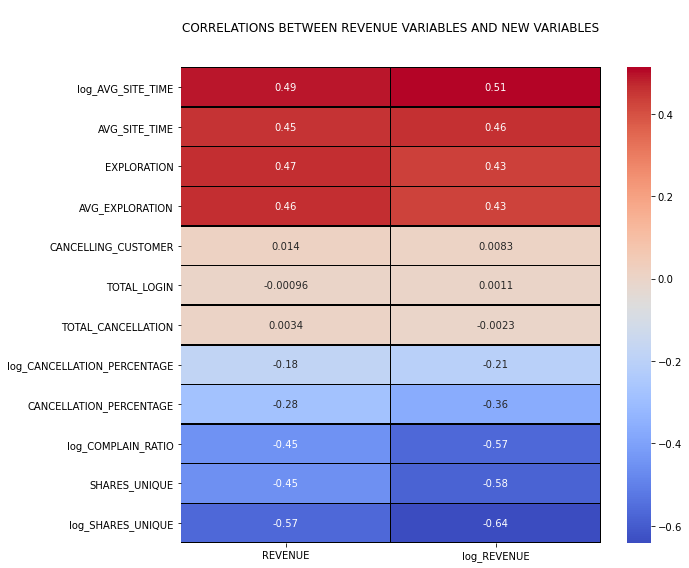

In [28]:
# Checking correlations for newly created variables
fig, ax = plt.subplots(figsize = (10,8))
# making list of relevant values
new_var = ["REVENUE","log_REVENUE","EXPLORATION","AVG_SITE_TIME",
           "log_AVG_SITE_TIME","CANCELLATION_PERCENTAGE","log_CANCELLATION_PERCENTAGE",
           "log_COMPLAIN_RATIO","TOTAL_CANCELLATION","SHARES_UNIQUE","log_SHARES_UNIQUE",
           "TOTAL_LOGIN","AVG_EXPLORATION","CANCELLING_CUSTOMER"]
# inserting list into correlation matrix
new_var_corr = df[new_var].corr(method = "pearson")
# visualising with heatmap
sns.heatmap(new_var_corr.loc[["EXPLORATION","AVG_SITE_TIME",
                              "log_AVG_SITE_TIME","CANCELLATION_PERCENTAGE","log_COMPLAIN_RATIO",
                              "TOTAL_CANCELLATION","SHARES_UNIQUE","log_SHARES_UNIQUE","log_CANCELLATION_PERCENTAGE",
                              "TOTAL_LOGIN" ,"AVG_EXPLORATION","CANCELLING_CUSTOMER"],
                             ["REVENUE","log_REVENUE"]].sort_values(by = "log_REVENUE", ascending = False),
            cmap = "coolwarm",
            annot = True,
            linecolor = "black",
            linewidth = 0.5)
plt.title("""
CORRELATIONS BETWEEN REVENUE VARIABLES AND NEW VARIABLES

""")
plt.tight_layout()
plt.show()

# MODELS

In [31]:
# defining target
target = df.loc[:,"REVENUE"]
# defining log_target
log_target = df.loc[:,"log_REVENUE"]
# dropping duplicated features, unsignificant values and target values from feature data
features = df.drop(["REVENUE","NAME","EMAIL","FIRST_NAME",
                    "FAMILY_NAME","log_REVENUE","TOTAL_PHOTOS_VIEWED",
                    "TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT",
                    "AVG_PREP_VID_TIME","SHARES_UNIQUE","AVG_SITE_TIME",
                    "AVG_EXPLORATION","log_CANCELLATION_PERCENTAGE","TOTAL_CANCELLATION",
                    "CANCELLATIONS_BEFORE_NOON","CANCELLATIONS_AFTER_NOON","COMPLAIN_RATIO"
                         ], axis = 1)


## LINEAR MODEL

In [32]:
ols_features = features.loc[:,["CROSS_SELL_SUCCESS","UNIQUE_MEALS_PURCH",
                               "CONTACTS_W_CUSTOMER_SERVICE","PRODUCT_CATEGORIES_VIEWED",
                               "TASTES_AND_PREFERENCES","PC_LOGINS","MOBILE_LOGINS",
                               "LATE_DELIVERIES","PACKAGE_LOCKER","REFRIGERATED_LOCKER",
                               "AVG_ORDER_SIZE","MASTER_CLASSES_ATTENDED",
                               "MEDIAN_MEAL_RATING","VIEWS_PHOTO",
                               "log_TOTAL_MEALS_ORDERED","log_AVG_PREP_VID_TIME",
                               "SQ_MEDIAN_MEAL_RATING","HIGH_CONTACT_W_CUSTOMER_SUPPORT",
                               "EXPLORATION","log_SHARES_UNIQUE","log_AVG_SITE_TIME",
                               "log_COMPLAIN_RATIO"]]

#train_test_split for OLS
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(ols_features,
                                                                    log_target,
                                                                    test_size = 0.25,
                                                                    random_state = 219)


In [33]:
# calling the OLS model
linear_model = sklearn.linear_model.LinearRegression()
# fitting with the training data
linear_fit = linear_model.fit(x_train_OLS, y_train_OLS)
# predicting on the x_test data
linear_pred = linear_fit.predict(x_test_OLS)

# extracting train, test, and gap values
linear_train_score = linear_model.score(x_train_OLS, y_train_OLS).round(4) 
linear_test_score  = linear_model.score(x_test_OLS, y_test_OLS).round(4)  
linear_train_test_gap = abs(linear_train_score - linear_test_score).round(4)

# extracting the coefficients
OLS_coef = linear_fit.coef_

# joining coefficients to column names
OLS_model_coef = zip(features.columns, OLS_coef.round(5))

# creating a list, starting with intercept
OLS_coef_lst = [('INTERCEPT', linear_fit.intercept_.round(decimals = 5))]

# looping over all coefficients, and appending to list
for coefficient in OLS_model_coef:       
        OLS_coef_lst.append(coefficient)



print(f"""
Linear Training Score : {linear_train_score} 
Linear Testing Score  : {linear_test_score} 
Linear Train-Test Gap : {linear_train_test_gap} 
""")



Linear Training Score : 0.7891 
Linear Testing Score  : 0.7881 
Linear Train-Test Gap : 0.001 



## LASSO MODEL

In [34]:
lasso_features = features.copy()


#train_test_split for Lasso
x_train_LAS, x_test_LAS, y_train_LAS, y_test_LAS = train_test_split(lasso_features,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 219)


In [35]:
# calling the lasso model
lasso_model = sklearn.linear_model.Lasso(alpha = 0.1, normalize = True)
# fitting the model with the training data
lasso_fit = lasso_model.fit(x_train_LAS, y_train_LAS)
# predicting with x_test data
lasso_pred = lasso_fit.predict(x_test_LAS)


# extracting train, test, and gap values
lasso_train_score = lasso_model.score(x_train_LAS, y_train_LAS).round(4) 
lasso_test_score  = lasso_model.score(x_test_LAS, y_test_LAS).round(4)  
lasso_train_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

# extracting the coefficients from the model
LASSO_coef = lasso_model.fit(x_train_LAS, y_train_LAS).coef_

# joining column names and coefficients
LASSO_model_coef = zip(features.columns, LASSO_coef.round(5))

# creating a list, starting with coefficient
LASSO_coef_lst =  [('INTERCEPT', lasso_fit.intercept_.round(decimals = 5))]

#looping over and skips any coefficients that are 0
for coefficient in LASSO_model_coef: 
    # filtering out coefficient = 0
    if coefficient[1] == 0:
        continue
    # appending rest to coef list
    else:
        LASSO_coef_lst.append(coefficient)   



print(f"""
LASSO Training Score : {lasso_train_score}
LASSO Testing Score  : {lasso_test_score} 
LASSO Train-Test Gap : {lasso_train_test_gap}
""")


LASSO Training Score : 0.7094
LASSO Testing Score  : 0.7208 
LASSO Train-Test Gap : 0.0114



## BAYESIAN AUTOMATIC RELEVANCE DETERMINATION MODEL

In [36]:
ARD_features = features.copy()


#train_test_split for ARD
x_train_ARD, x_test_ARD, y_train_ARD, y_test_ARD = train_test_split(ARD_features,
                                                                    log_target,
                                                                    test_size = 0.25,
                                                                    random_state = 219)

In [37]:
# initiating the ard model
ard_model = sklearn.linear_model.ARDRegression(normalize = True)
# fitting the model to the training data
ard_fit = ard_model.fit(x_train_ARD, y_train_ARD)
# using fit to predict on x_test data
ard_pred = ard_fit.predict(x_test_ARD)


# extracting train, test, and gap values
ard_train_score = ard_model.score(x_train_ARD, y_train_ARD).round(4) 
ard_test_score  = ard_model.score(x_test_ARD, y_test_ARD).round(4)  
ard_train_test_gap = abs(ard_train_score-ard_test_score).round(4)  

# extracting the coefficients
ARD_coef = ard_fit.coef_

# zipping them together
ARD_model_coef = zip(features.columns, ARD_coef.round(5))

# creating a list, starting with the intercept
ARD_coef_lst = [('INTERCEPT', ard_fit.intercept_.round(decimals = 5))]

# looping over the coefficient combinations
for coefficient in ARD_model_coef:
    # filtering out coefficients == 0
    if coefficient[1] == 0:
        continue
    # appending other coefficients to the list
    else:
        ARD_coef_lst.append(coefficient)

# printing output of model
print(f"""
ARD Training Score : {ard_train_score} 
ARD Testing Score  : {ard_test_score} 
ARD Train-Test Gap : {ard_train_test_gap} 
""")


ARD Training Score : 0.7894 
ARD Testing Score  : 0.786 
ARD Train-Test Gap : 0.0034 



## K NEAREST NEIGHBOR MODEL 

In [38]:
knn_features = features.loc[:,["UNIQUE_MEALS_PURCH",
                               "CONTACTS_W_CUSTOMER_SERVICE",
                               "log_TOTAL_MEALS_ORDERED","log_AVG_PREP_VID_TIME",
                               "MEDIAN_MEAL_RATING","SQ_MEDIAN_MEAL_RATING",
                               "HIGH_CONTACT_W_CUSTOMER_SUPPORT",
                               "log_SHARES_UNIQUE","log_AVG_SITE_TIME"]]


# Standardizing the dataset
scaler = StandardScaler()
scaler.fit(knn_features)
x_scaled = scaler.transform(knn_features)

# inserting standardized dataset to a new dataframe
x_scaled_df = pd.DataFrame(x_scaled)

# train test split for knn
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(x_scaled_df,
                                                                    log_target,
                                                                    test_size = 0.25,
                                                                    random_state = 219)

In [39]:
# Initiating knn-model
knn_model = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors =7)

# fit model to training data
knn_fit = knn_model.fit(x_train_KNN, y_train_KNN)

# predicting on x_test data
knn_reg_pred = knn_fit.predict(x_test_KNN)

# creting output variables to be used
knn_train_score = knn_model.score(x_train_KNN, y_train_KNN).round(4) 
knn_test_score  = knn_model.score(x_test_KNN, y_test_KNN).round(4)  
knn_train_test_gap = abs(knn_train_score - knn_test_score).round(4)

# printing output
print(f"""
KNN Training Score : {knn_train_score}
KNN Testing Score  : {knn_test_score}
KNN Train-Test Gap : {knn_train_test_gap}
""")


KNN Training Score : 0.84
KNN Testing Score  : 0.8125
KNN Train-Test Gap : 0.0275



# MODEL OUTPUT

In [40]:
print(f"""
\t\t\t\t\tMODEL SUMMARY


Model\t\t\tTrain Score\tTest Score\tTrain Test Gap\t\tModel Size
{"-"*85}
OLS \t\t\t{linear_train_score}\t\t{linear_test_score}\t\t{linear_train_test_gap}\t\t\t{len(OLS_coef_lst)}
Lasso\t\t\t{lasso_train_score}\t\t{lasso_test_score}\t\t{lasso_train_test_gap}\t\t\t{len(LASSO_coef_lst)}
ARD\t\t\t{ard_train_score}\t\t{ard_test_score}\t\t{ard_train_test_gap}\t\t\t{len(ARD_coef_lst)}
KNN-S-14 (FINAL MODEL)\t{knn_train_score}\t\t{knn_test_score}\t\t{knn_train_test_gap}\t\t\tNA*

*{len(knn_features.columns)} variables used.


\t\t\t\t\tCOEFFICIENTS
""")

print(f"""

Ordinary Least Squares 

Coefficients Name\t\t\tCoefficient Value
{"-"*60}""")
# looping over the coefficient list
for i, k in enumerate(OLS_coef_lst):
    print(f"{i+1}. {OLS_coef_lst[i][0]:<30s}\t\t{OLS_coef_lst[i][1]:>15f}")
    
print(f"""

Lasso

Coefficients Name\t\t\tCoefficient Value
{"-"*60}""")
# looping over the coefficient list
for i, k in enumerate(LASSO_coef_lst):
    print(f"{i+1}. {LASSO_coef_lst[i][0]:<30s}\t\t{LASSO_coef_lst[i][1]:>15f}")
    
print(f"""

Bayesian Automatic Relevance Determination

Coefficients Name\t\t\t  Coefficient Value
{"-"*60}""")
# looping over the coefficient list
for i, k in enumerate(ARD_coef_lst):
    print(f"{i+1}. {ARD_coef_lst[i][0]:<30s}\t\t{ARD_coef_lst[i][1]:>15f}")
    



					MODEL SUMMARY


Model			Train Score	Test Score	Train Test Gap		Model Size
-------------------------------------------------------------------------------------
OLS 			0.7891		0.7881		0.001			23
Lasso			0.7094		0.7208		0.0114			27
ARD			0.7894		0.786		0.0034			30
KNN-S-14 (FINAL MODEL)	0.84		0.8125		0.0275			NA*

*9 variables used.


					COEFFICIENTS



Ordinary Least Squares 

Coefficients Name			Coefficient Value
------------------------------------------------------------
1. INTERCEPT                     		       1.882130
2. CROSS_SELL_SUCCESS            		      -0.014620
3. UNIQUE_MEALS_PURCH            		       0.048560
4. CONTACTS_W_CUSTOMER_SERVICE   		       0.036540
5. PRODUCT_CATEGORIES_VIEWED     		       0.001210
6. MOBILE_NUMBER                 		       0.009830
7. TASTES_AND_PREFERENCES        		      -0.002810
8. PC_LOGINS                     		      -0.005120
9. MOBILE_LOGINS                 		      -0.000480
10. WEEKLY_PLAN                   		      -0.007310
11.